<a href="https://colab.research.google.com/github/Mahima2208/Airline_Passenger_Referal_Prediction_Classification/blob/main/Airline_passenger_referral_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIRLINE PASSENGER REFERAL PREDICTION**

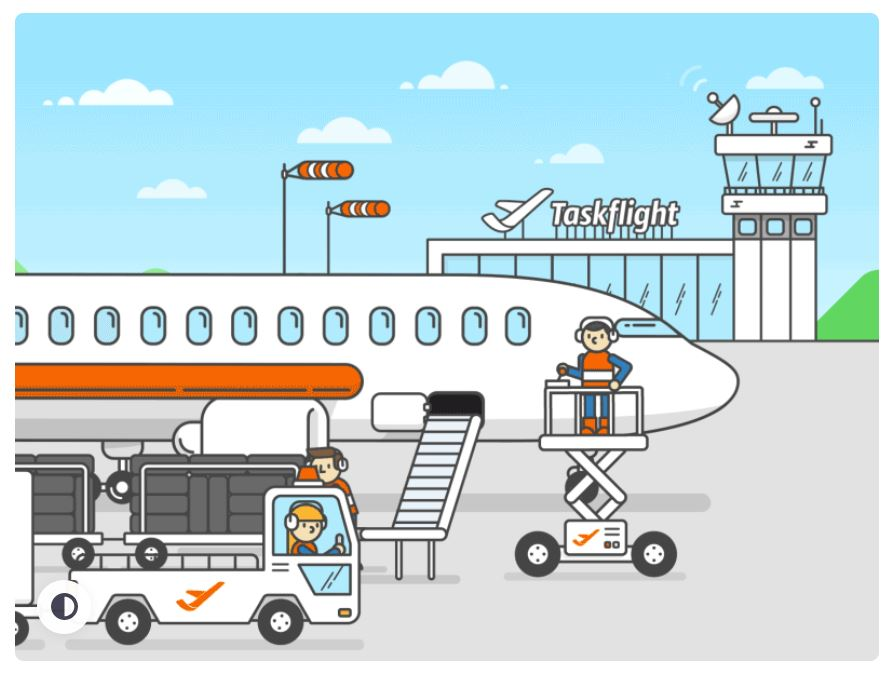

**Any child who sees a plane in the sky fantasises about riding in it. Traveling by plane has become a craze, and as an adult, one will consider taking care of the experience. As a result, the opinions of those who have travelled have become increasingly important. This improved people's positive travel experiences, as well as the airlines' ability to understand what their customers are feeling and this increased the amount of room for improvement that airlines can do.**


**The main objective of this project is to predict whether passengers will refer the airline to their friends. In this project we deployed multiple machine learning models to see the performance.**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with
multiple choice and free text questions. Data is scraped in Spring 2019. The main objective
is to predict whether passengers will refer the airline to their friends.

# **IMPORTING THE NECESSARY LIBRARIES**

In [127]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
from datetime import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [128]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Reading dataset.
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Classification/data_airline_reviews.xlsx')

## **DATA EXPLORATION**

In [130]:
# first look of the dataset.
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# first look of the dataset.
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [132]:
# Shape of the dataset.
df.shape

(131895, 17)

The shape of our dataset is 131895 rows and 17 columns.

In [133]:
# Columns available

df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

# **Feature descriptions briefly as follows:**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**reviewdate:** Date of the Review customer review: Review of the customers in free text format

**aircraft:** Type of the aircraft

**travellertype:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seatcomfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5 entertainment: Rated between 1-5

**groundservice:** Rated between 1-5

**valueformoney:** Rated between 1-5

**recommended:** Binary, target variable.

In [134]:
# Checking the data type
df.dtypes

airline             object
overall            float64
author              object
review_date         object
customer_review     object
aircraft            object
traveller_type      object
cabin               object
route               object
date_flown          object
seat_comfort       float64
cabin_service      float64
food_bev           float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
dtype: object

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64



*   **Looks like  that the dataset has a large number of missing values.**







In [136]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000




*   Here we can see that the mean values and the 50 % values are nearly equal that means the variable are normally distributed.



In [137]:
# Count of null or missing values.
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

 

*   There are alot of null values.
*   We are see that more than 50% of the dataset are not having values.
*   We have to drop aircraft column as it is having nearly 80% of null values that means that column will be of no use in our prediction.



In [138]:
df1 = df.copy()

# Making a copy of the dataset so as to keep the original data intact.

# **DATA CLEANING**

In data cleaning we will check for:


1.   Null values/NaN values
2.   Duplicates 
3.   Outlier Detection



**Dropping Unnecessary Columns**

In [139]:
# Removing unnecessary columns.
airline_df = df1.drop(['author','aircraft','date_flown','route','review_date','customer_review'],axis = 1)



 
*   These columns does not have any significance in predictive analysis and also contains huge null values, so its been removed.





Checking Duplicated values

In [140]:
#Counting number of duplicate values
airline_df.duplicated().sum()

85121

In [141]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)



*   There were 85121 duplicated values. Removing the duplicated values and keeping only first values.




In [142]:
#Counting number of duplicate values
airline_df.duplicated().sum()

0

# Creating a Data Frame with all the Numerical Features

In [143]:
numerical_df = airline_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money']]

**KNN Imputer:-**
* KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. 
* It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. 
* In this approach, we specify a distance from the missing values which is also known as the K parameter. 
* The missing value will be predicted in reference to the mean of the neighbours.
* It is implemented by the KNNimputer() method 

In [144]:
# Filling null values with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
numerical_df = pd.DataFrame(imputer.fit_transform(numerical_df),columns = numerical_df.columns)

* For the numerical values we have used KNNImputer to impute data into null values.KNN is a very effective for data imputation.

In [145]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46774 entries, 0 to 46773
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          46774 non-null  float64
 1   seat_comfort     46774 non-null  float64
 2   cabin_service    46774 non-null  float64
 3   food_bev         46774 non-null  float64
 4   entertainment    46774 non-null  float64
 5   ground_service   46774 non-null  float64
 6   value_for_money  46774 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB


* Let's merge again the numerical columns into our main dataframe after cleaning the data. 

In [146]:
airline_df = airline_df.drop(columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service', 'value_for_money'])

In [147]:
airline_df = pd.concat([airline_df.reset_index(),numerical_df.reset_index()], axis =1)

In [148]:
airline_df.isnull().sum()

index                  0
airline                1
traveller_type     17023
cabin                969
recommended          493
index                  0
overall                0
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
dtype: int64

* Here we can clearly see that there are no null values in the numerical values but still there are null values for other values.
* We can also see there are null values in recommended column We have to drop those rows because even if we use mode to fill the null values It will result in wrong predictions so it's better to drop those.

In [149]:
# droping the rows which have all values as NaN
airline_df.dropna(axis=0,how='any',inplace = True)

In [150]:
airline_df = airline_df.dropna(subset=['recommended'])

In [151]:
airline_df.isnull().sum()

index              0
airline            0
traveller_type     0
cabin              0
recommended        0
index              0
overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
dtype: int64

* Voila Now we can say we don't have any null values in our dataset!!!  

In [152]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29731 entries, 1 to 46705
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            29731 non-null  int64  
 1   airline          29731 non-null  object 
 2   traveller_type   29731 non-null  object 
 3   cabin            29731 non-null  object 
 4   recommended      29731 non-null  object 
 5   index            29731 non-null  int64  
 6   overall          29731 non-null  float64
 7   seat_comfort     29731 non-null  float64
 8   cabin_service    29731 non-null  float64
 9   food_bev         29731 non-null  float64
 10  entertainment    29731 non-null  float64
 11  ground_service   29731 non-null  float64
 12  value_for_money  29731 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 3.2+ MB


* Now we have the shape of our dataset as 29731 rows and 11 columns

In [153]:
feat = [feature for feature in numerical_df.columns]

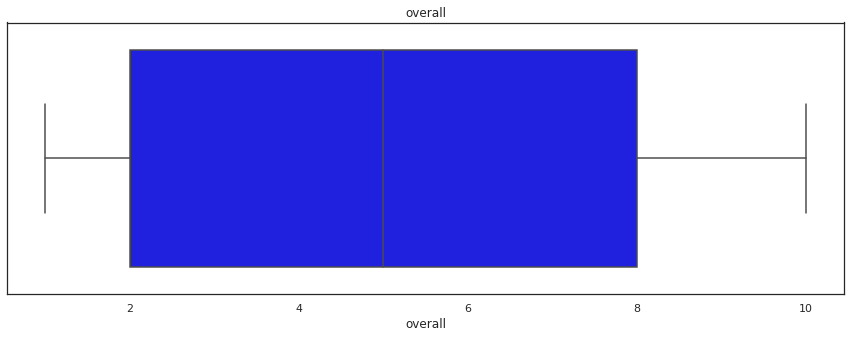

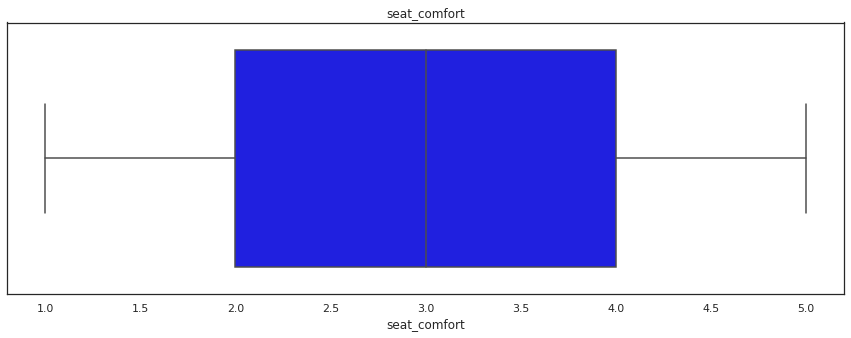

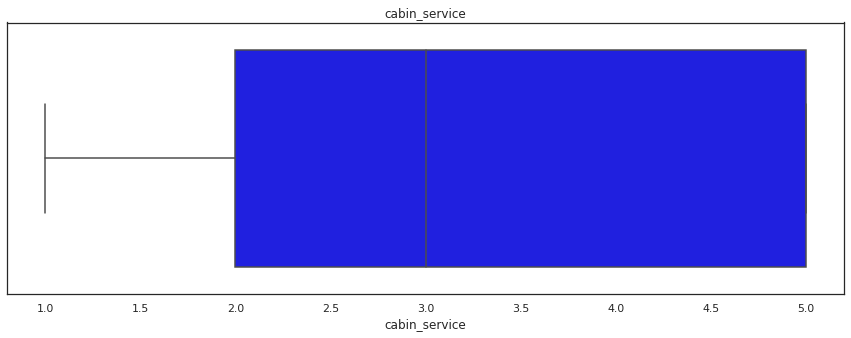

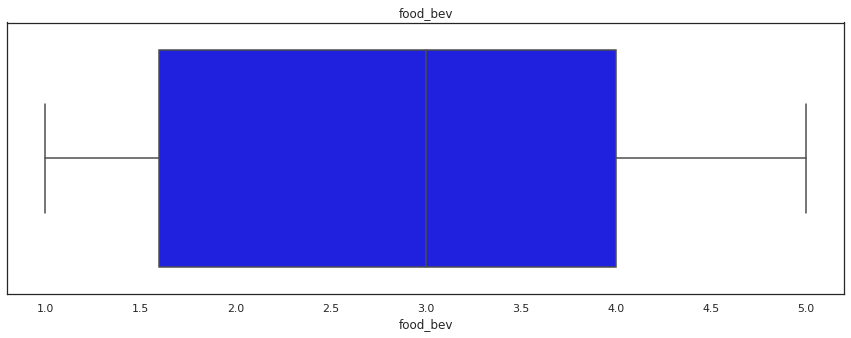

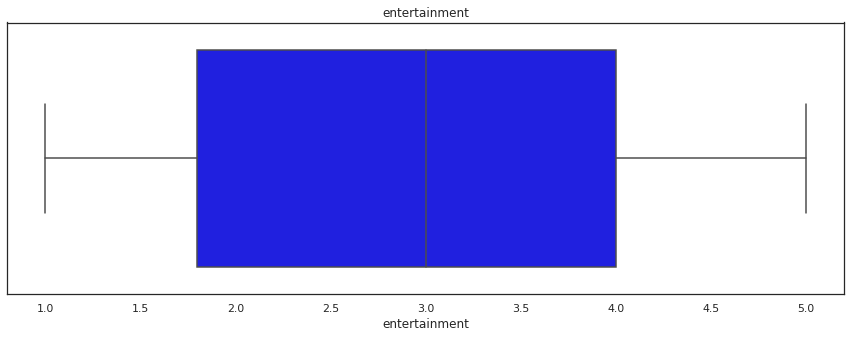

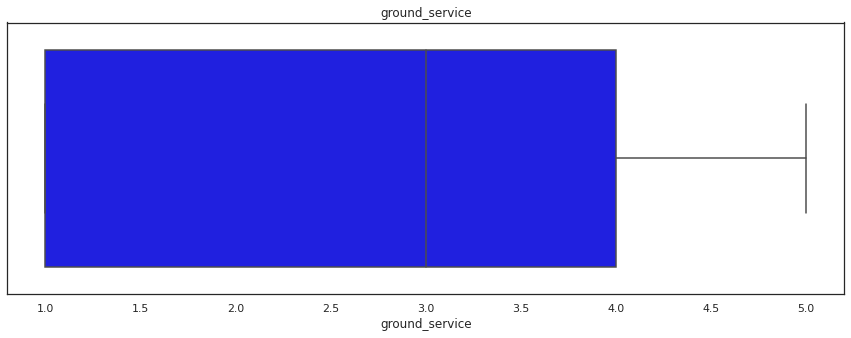

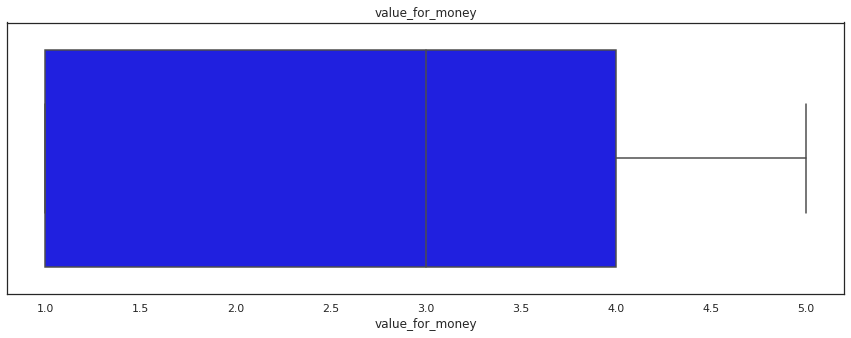

In [154]:
  
for feature in feat:
    plt.figure(figsize = (15,5))
    sns.boxplot(feature, data = airline_df,dodge='true', orient="v",palette = ['blue'])
    plt.title(feature)
    plt.show()

* We can see that there are no outliers present in our data.

# Data Visualizations

PIE CHART FOR UNIQUE CABIN 

In Github we cannot see Plotly graphs so giving the link to access the plot

[UNIQUE CABIN](https://drive.google.com/file/d/1Yq0djAlhoWw5r1EOzllBBj-BB2R_xf2c/view?usp=sharing)

In [155]:
import plotly.express as px
#Plotting graph for cabin
fig = px.pie(airline_df['cabin'], values=airline_df['cabin'].value_counts(),names=['Economy Class','Business Class','PremiumEconomy','First Class'], 
             hole = 0.4,color_discrete_sequence=px.colors.sequential.RdBu,width=700,height=500)
fig.show()


* From above graph we can clearly see that nearly 76 % flyers are from Economy Class cabin followed by Businessclass that is 17 % 

COUNTPLOT FOR CABIN WRT RECOMMENDED

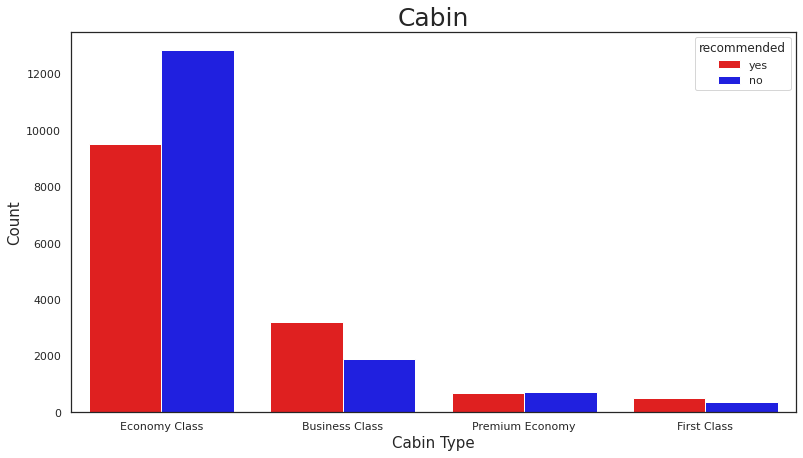

In [156]:
# Most recommended cabin.
plt.figure(figsize=(13,7))
sns.set_theme(style="white")

sns.countplot(airline_df['cabin'],hue=airline_df['recommended'],palette=['red','blue'])
plt.title('Cabin',fontsize = 25)
plt.xlabel('Cabin Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

* So, economy class has the most recommendation whereas first class has the least recommendation.
* In economy class we can see No are more than yes.

**COUNTPLOT FOR TRAVELLER_TYPE WITH MOST RATINGS**



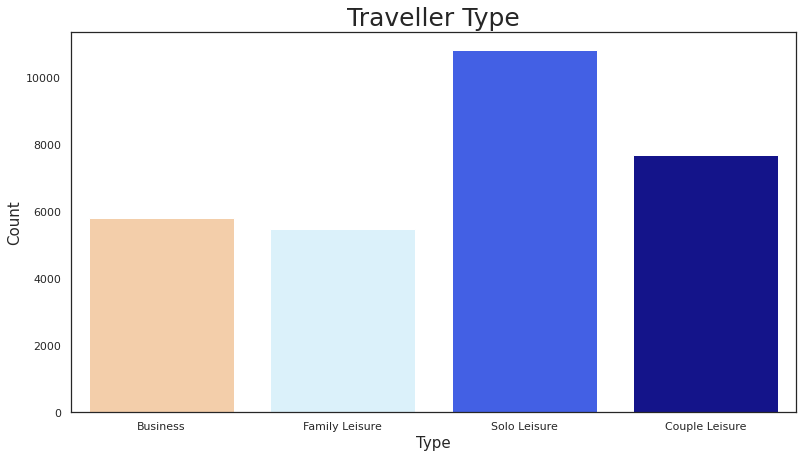

In [157]:
# Traveller type with most ratings.
plt.figure(figsize = (13,7))
sns.set_theme(style="white")
sns.countplot(airline_df['traveller_type'],palette="flag")
plt.title('Traveller Type',fontsize = 25)
plt.xlabel('Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()



* Its clear from the countplot that 'Solo Leisure' has highest ratings among all whereas 'Family Leisure' has the least ratings.

NOW LET'S SEE THE TOP 10 AIRLINES

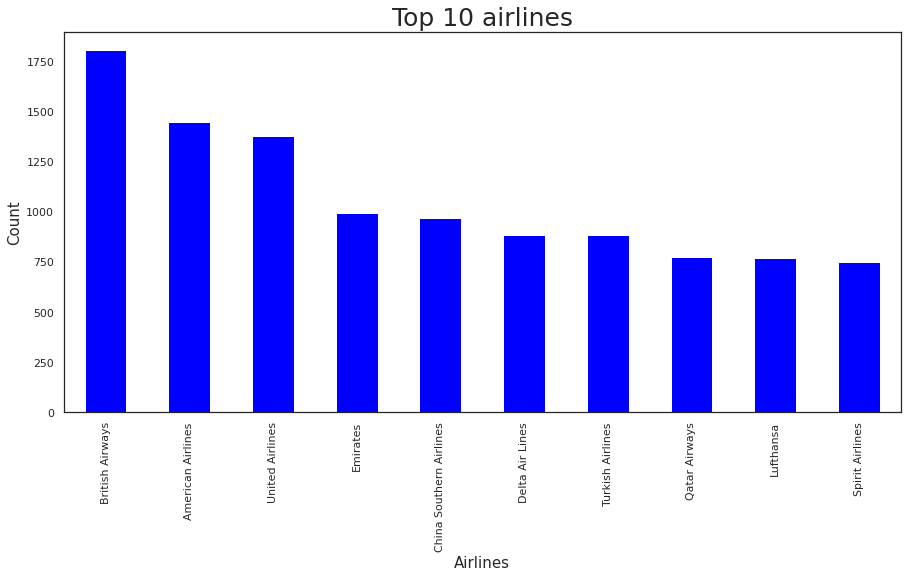

In [158]:
air=airline_df['airline'].value_counts()
# Visualisation of top 10 airlines in the dataset.
sns.set_theme(style="white")
plt.figure(figsize=(15,7))
air[:10].plot(kind='bar',color ='#0000FF')
plt.title('Top 10 airlines',fontsize=25)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()



* 'British airways' has the maximum number of trips and this can be attributed to its ultra low cost fare compared to other airlines.

 **HISTOGRAM FOR RECOMMENDED**

In Github we cannot see Plotly graphs so giving the link to access the plot

[Histogram for Recommended](https://drive.google.com/file/d/1xU_kHbIXbryWBl4FPXol6zEw2WXXS2t5/view?usp=sharing)

In [159]:
# Count of target variable (recommended).
airline_df['recommended'].value_counts()

# It is a binary classification problem.

no     15817
yes    13914
Name: recommended, dtype: int64

In [160]:
import plotly.express as px

px.histogram(airline_df, x="recommended",color="recommended",template="simple_white",width=700,height=500)

* Clearly, 'No' responses are more as compared to 'Yes' responses
* But It seems nearly balanced target variable.

COUNTPLOT FOR AIRLINES

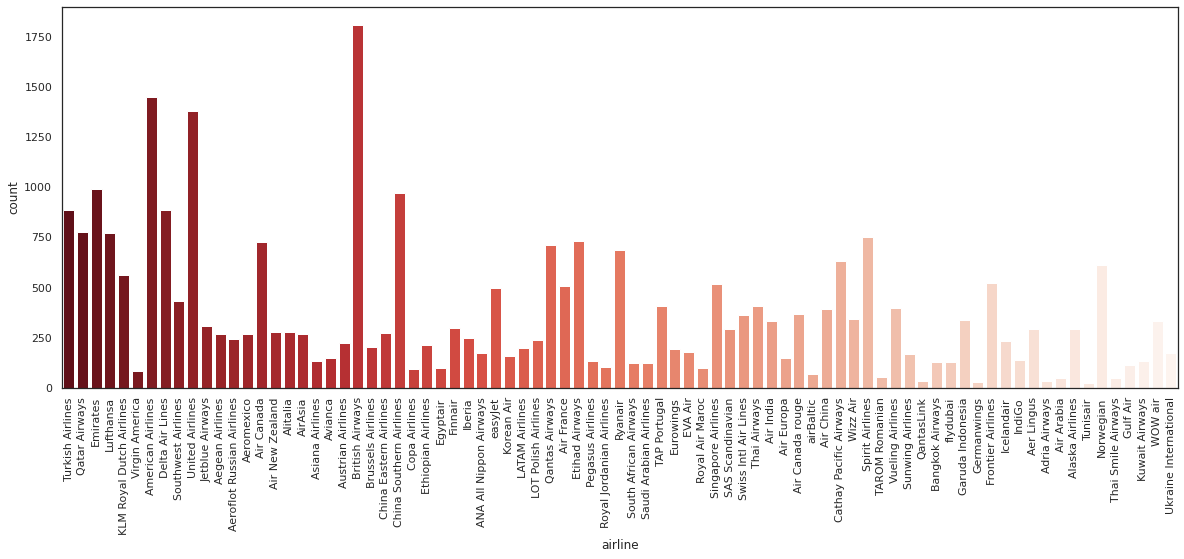

In [161]:
sns.set(rc={'figure.figsize':(20,7)})
sns.set_theme(style="white")
category_count=sns.countplot(x="airline",data=airline_df,palette="Reds_r")
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
sns.set_style("whitegrid")

* As we have seen earlier 'British Airways' is the topmost Airline. 
* 'Tunisair','Germanwings' etc are the lowest number of trips.

In [162]:
# Mapping the target feature with numerical data.
airline_df['recommended']=airline_df['recommended'].map({'yes':1,'no':0})


In [163]:
airline_df.drop(columns='index',inplace=True)

# HEATMAP

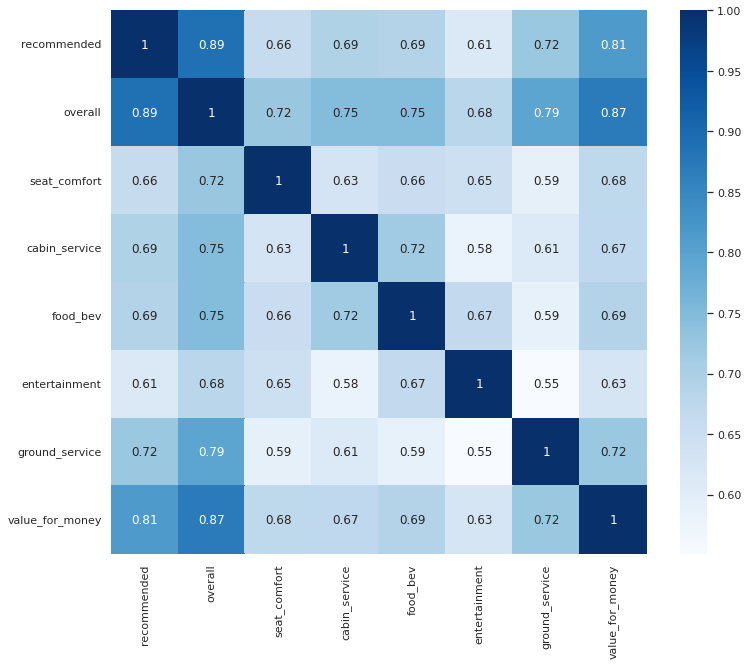

In [164]:
# Correlation.
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True, cmap='Blues')
plt.show()


* We can see there are some highly correlated values like value_for_money,overall etc

In [165]:
features=airline_df.columns

In [166]:
features

Index(['airline', 'traveller_type', 'cabin', 'recommended', 'overall',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money'],
      dtype='object')

In [167]:
features_1= features.drop(['airline','recommended'])

 **PLOT FOR THE FEATURES WRT TO RECOMMENDED**

traveller_type


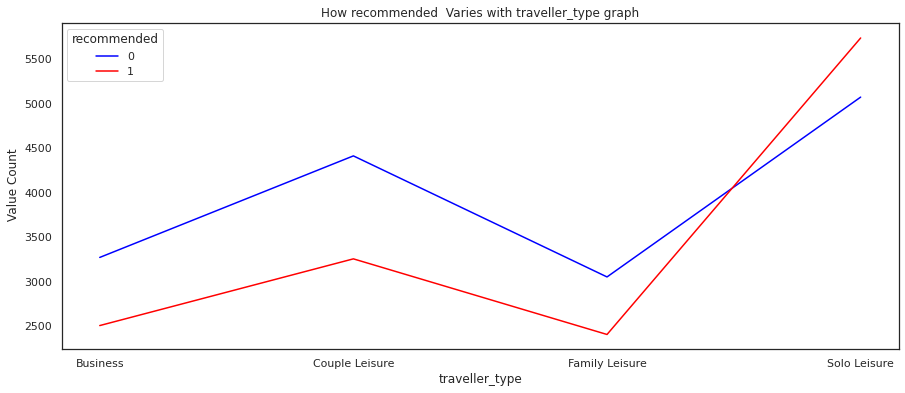

cabin


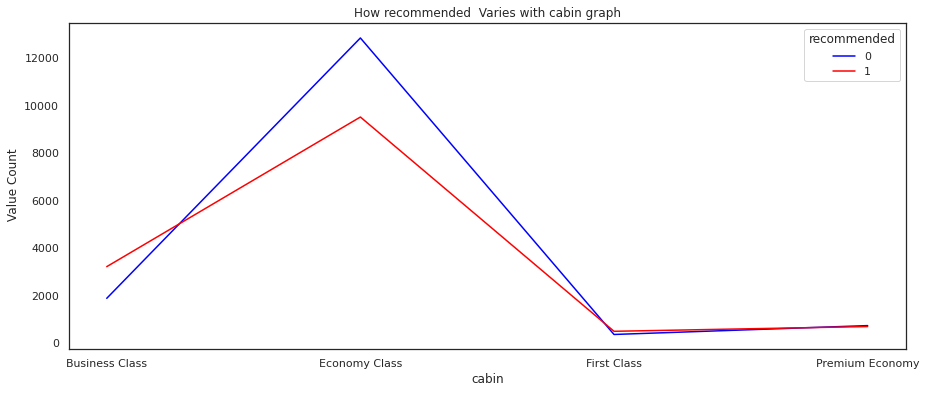

overall


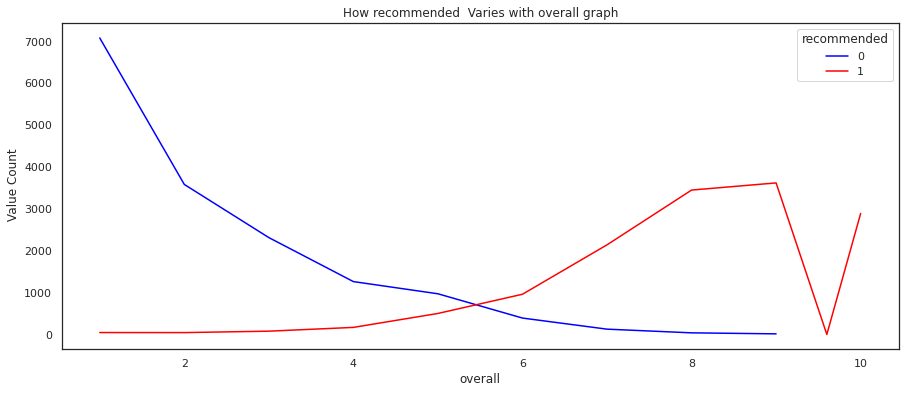

seat_comfort


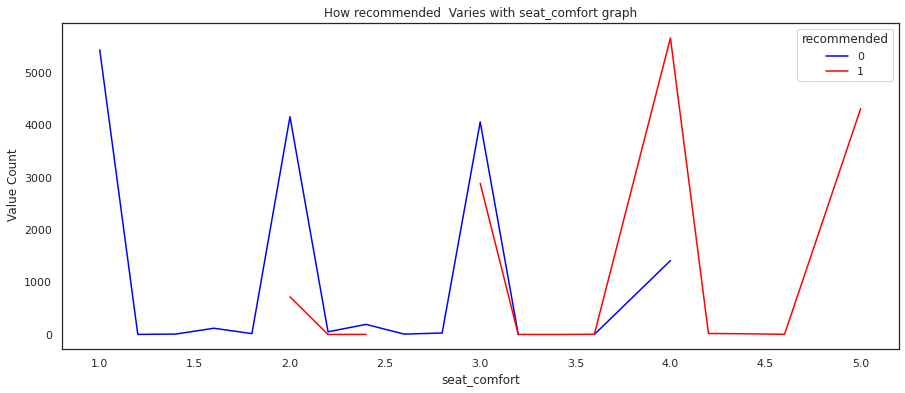

cabin_service


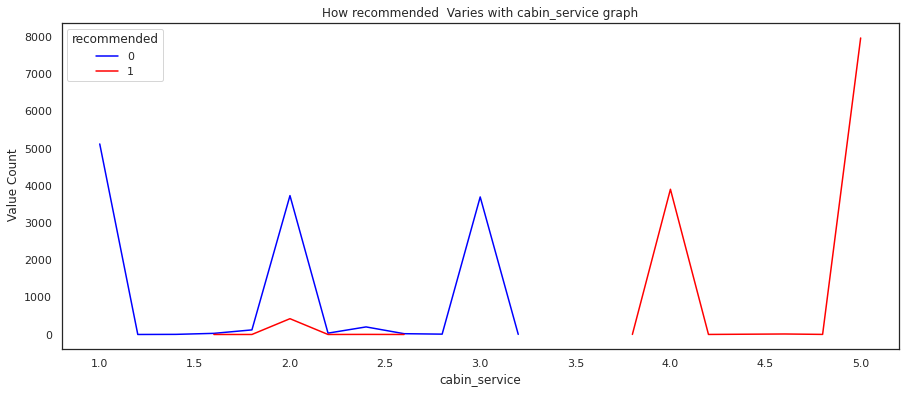

food_bev


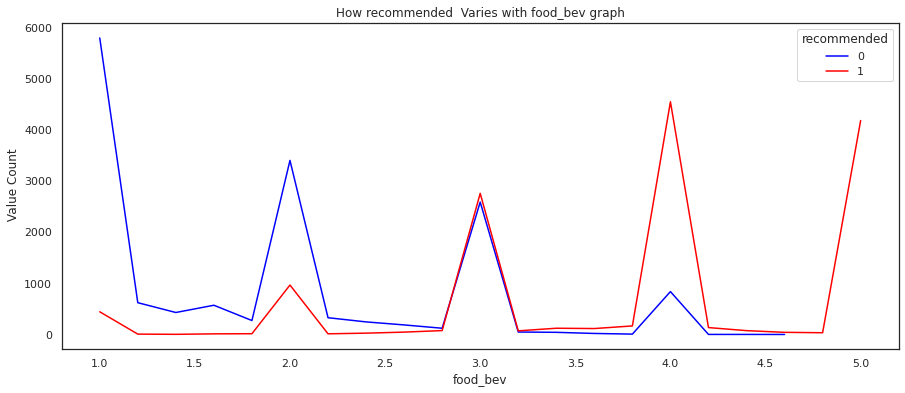

entertainment


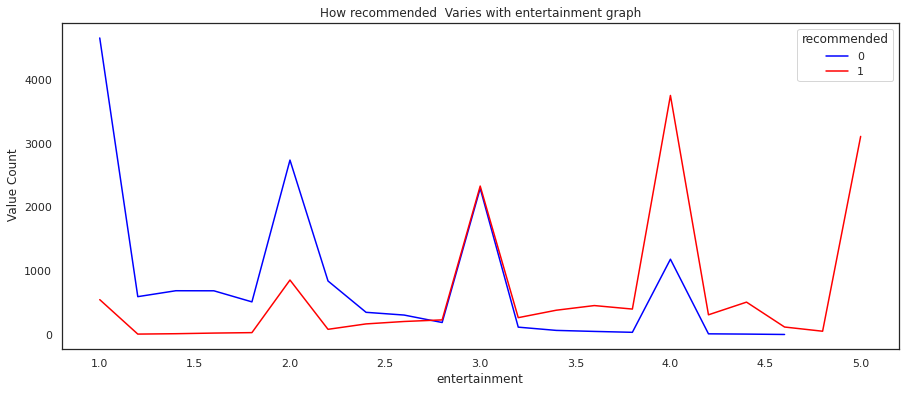

ground_service


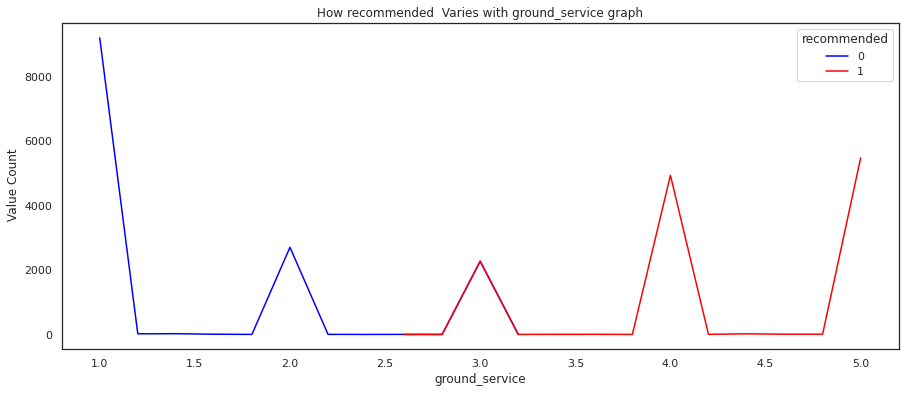

value_for_money


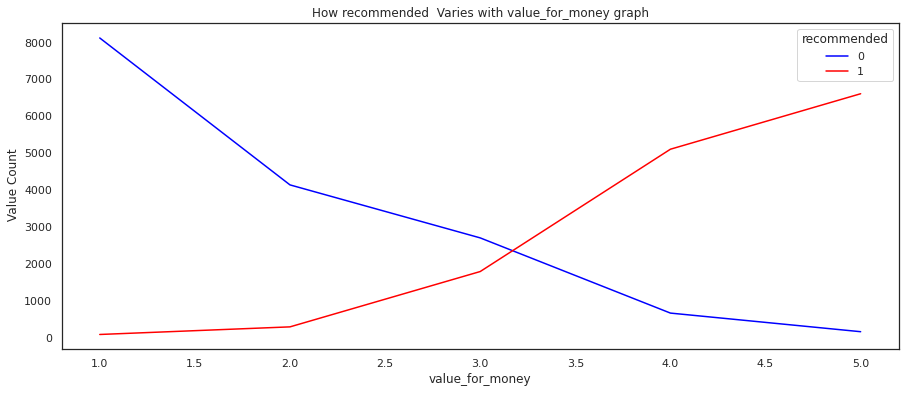

In [168]:
for feature in features_1:
  print(feature)
  sns.set_theme(style="white")
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='line',figsize=(15,6),color=['blue','red'])
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

1. We can see, in both the business and leisure traveler types, that both the recommendation trend in terms of yes or no increases from business to couple leisure and it decreases to family and again reaches a high level in solo leisure. Which indicate people prefer solo leisure higher than any of the other leisures.

2. With regards to cabin type, it has been determined that both yes and no recommendation trends increase from business class to economy class, then decrease to first class, and again increase slightly in premium class. This indicates most people travel in economy class.

3. Generally, we can observe a very good insight which is also regular in the overall rating. We can see that positive recommendations increase with the overall rating, while negative recommendations decrease.

4. In seat comfort we can see the negative recommendation is there till 4.0 rating but after that we can see positive recommendation also.

5. In cabin service also we can see the similar trend as seat comfort negative recommendation is there till 3.0 rating but after that we can see positive recommendation also.

6. In food bev we can see mixed recommendations initially as the negative recommendation decreases positive recommendations are increasing.

7. In entertainment we can see mixed recommendations initially as the negative recommendation decreases positive recommendations are increasing.

8. In ground service we can see negative recommendations only at first till 2.5 after that positive recommendations took over

9. Lastly in Value for money rating we can see same as the positive recommendation increases with the overall rating and also negative recommendation on the same decreases also we can an intersection in Value for money rating greater than 3.0 where we can see similar positive and negative recommendation.



In [169]:
airline_df.drop(["airline"], axis = 1, inplace = True)

# Dropping the 'airline' column as it is no more needed for further predictive analysis.

**ONE HOT ENCODING**

In this technique, the categorical parameters will prepare separate columns for both Male and Female labels. So, wherever there is Male, the value will be 1 in Male column and 0 in Female column and vice-versa.
 

In [170]:
traveller_type = pd.get_dummies(airline_df['traveller_type'],drop_first=True)
airline_df = pd.concat([airline_df,traveller_type],axis='columns')

cabin = pd.get_dummies(airline_df['cabin'],drop_first=True)
airline_df = pd.concat([airline_df,cabin],axis='columns')

airline_df.drop(['traveller_type','cabin'],axis=1,inplace=True)

# **Model Preparation**

In [171]:
# Segregating dependent variable (target variable) and independent variables (input variable).
X = airline_df.drop(['recommended'],axis=1)      # Independent or input variable.
Y = airline_df['recommended']                    # Dependent or target variable.

In [172]:
Y.value_counts()[0]/len(Y)*100

53.200363257206284

In [173]:
Y.value_counts()[1]/len(Y)*100

46.799636742793716

In [174]:
# Splitting the data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Training dataset is 80% of total dataset.
# Testing dataset is 20% of total dataset.

In [175]:
# Shape of X_train and X_test data.
print(X_train.shape)
print(X_test.shape)

(23784, 13)
(5947, 13)


In [176]:
# Shape of Y_train and Y_test data.
print(Y_train.shape)
print(Y_test.shape)

(23784,)
(5947,)


In [177]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    12681
1    11103
Name: recommended, dtype: int64

 Distribution of classes of dependent variable in test :
0    3136
1    2811
Name: recommended, dtype: int64


We can see the classes for train and test are properly scaled. So we do not need to perform undersampling or oversampling as it is already properly scaled.

**EVALUATION METRICS FOR CLASSIFICATION**


# **Confusion Matrix:-**
Confusion Matrix is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values.

1. Accuracy
Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.

2. Precision —Precision explains how many of the correctly predicted cases actually turned out to be positive. Precision is useful in the cases where False Positive is a higher concern than False Negatives. The importance of Precision is in music or video recommendation systems, e-commerce websites, etc. where wrong results could lead to customer churn and this could be harmful to the business.

3. Recall (Sensitivity) — Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is a useful metric in cases where False Negative is of higher concern than False Positive. It is important in medical cases where it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected!

4. F1 Score — It gives a combined idea about Precision and Recall metrics. It is maximum when Precision is equal to Recall.

5. AUC-ROC — The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’.The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. From the graph, we simply say the area of the curve ABDE and the X and Y-axis.


In [178]:
# Declaring a dataset for storing the evaluation metrics for each of the model.
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns = column_names)

In [179]:
def add_metrics_details(model_name,Y_test,Y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(Y_test, Y_pred), 
                  'RECALL': recall_score(Y_test, Y_pred),
                  'PRECISION':precision_score(Y_test, Y_pred),
                  'F1-SCORE':f1_score(Y_test, Y_pred),
                  'ROC AUC SCORE':roc_auc_score(Y_test,Y_pred)}
                  ,ignore_index=True)
  return df

# **MODEL IMPLEMENTATION**

**1.Logistic Regression**

This type of statistical model is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [180]:
#Initializing Logistic Model object

logistic_regression_clf= LogisticRegression(fit_intercept=True, max_iter=10000)
#Taining a model with x and y
logistic_regression_clf.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [181]:
logistic_regression_clf.coef_

array([[ 0.9824317 ,  0.18125567,  0.22109211,  0.15028239,  0.03803753,
         0.24436655,  0.67784735, -0.39602124, -0.18627012, -0.03861502,
         0.06978491, -0.39857085, -0.20938937]])

In [182]:
logistic_regression_clf.intercept_

array([-9.70035453])

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3136
           1       0.95      0.95      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.29174373633765%



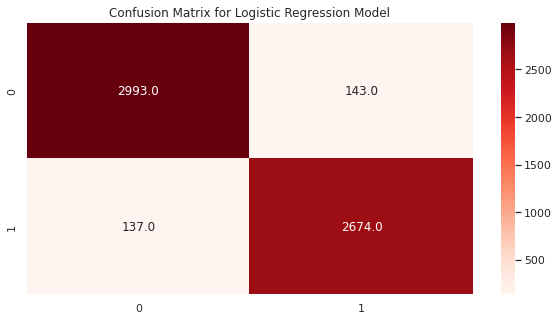

In [183]:
# Evaluation of the logistic regression model.
Y_pred = logistic_regression_clf.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Reds")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

In [184]:
# Adding model performance in evaluation metric dataframe that create above 
metrics_df = add_metrics_details("Logistic Regression",Y_test,Y_pred,metrics_df)

**2.Decision tree**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [185]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(X_train,Y_train)

DecisionTreeClassifier()

In [186]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(X_train,Y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(X_test,Y_test))

Training Accuracy of Decision Tree Model is 0.9953329969727548
Testing Accuracy of Decision Tree Model is 0.925508659828485


In [187]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [188]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [189]:
#calling an best params
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [190]:
#calling an best score
tree_cv.best_score_

0.9511436203174888

**Fitting the Best estimators After Hyperparameter tuning for Decision tree**

In [191]:
#Fitting an best parameters to Decision tree Model
final_tree_after_hyper_param_tune=tree_cv.best_estimator_
final_tree_after_hyper_param_tune.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.08996132503783%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree  Model')

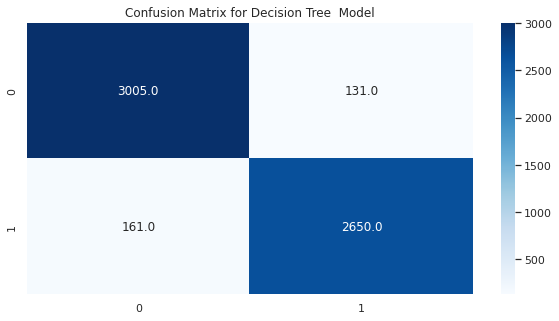

In [192]:
# Evaluation of the decision tree model
Y_pred = final_tree_after_hyper_param_tune.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues")
plt.title("Confusion Matrix for Decision Tree  Model")

In [193]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("Decision Tree",Y_test,Y_pred,metrics_df)

## 3. Ensembles of Decision Trees

Ensemble methods, which combines several decision trees to produce better predictive performance than utilizing a single decision tree. The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.

3.1 Bagging

Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

**3.1.1 Random forest**

Random Forest is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. When you have many random trees. It’s called Random Forest 

In [194]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_test, Y_test)

0.9500588532032958

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.00588532032957%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Model')

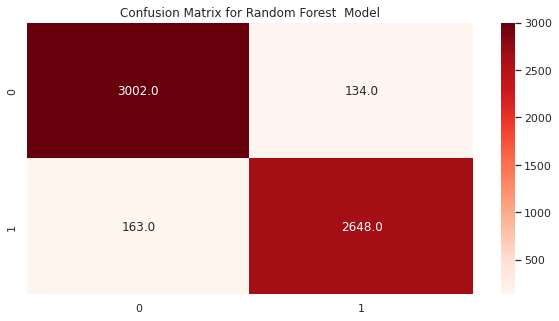

In [195]:
#Evaluation of the model
Y_pred = rf.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Reds")
plt.title("Confusion Matrix for Random Forest  Model")

In [196]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("Random Forest",Y_test,Y_pred,metrics_df)

**RANDOM FOREST (GridSearchCV)**

In [197]:
# Hyperparameter tuning.
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [198]:
rf_gridcv = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Evaluating the optimal parameters.
rf_gridcv.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   0.7s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [199]:
# Best estimator.
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=80)

In [200]:
# Best parameter.
rf_gridcv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 80}

In [201]:
rf_gridcv_best = rf_gridcv.best_estimator_
Y_pred = rf_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.22448293257104%



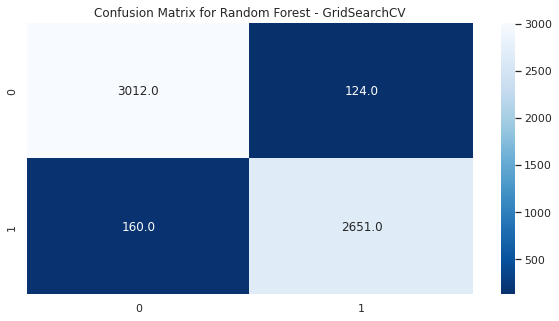

In [202]:
# Evaluation of the model
Y_pred = rf_gridcv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest - GridSearchCV")
plt.show()

In [203]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("Random Forest - GridSearchCV",Y_test,Y_pred,metrics_df)

## 3.2 Boosting

Boosting is another ensemble technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

3.2.1 XGBoost

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [204]:
import xgboost as xgb

#xgboost model
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train,Y_train)
score=xgb_model.score(X_test,Y_test)
print(f'XGBoost score : {score}')


XGBoost score : 0.9534218933916261


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.95      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.34218933916262%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost')

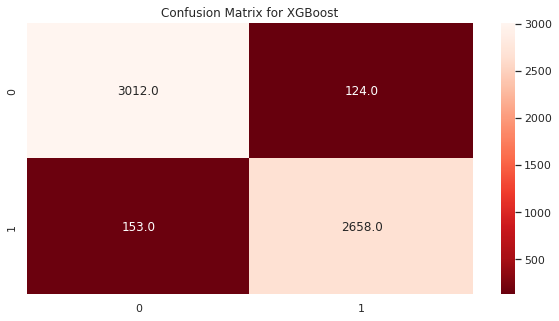

In [205]:
#Evaluation of the model
Y_pred = xgb_model.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Reds_r")
plt.title("Confusion Matrix for XGBoost")

In [206]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details(" XGBoost",Y_test,Y_pred,metrics_df)

XGBoost gridsearch cv

In [207]:
# Hyperparameter tuning.
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [208]:
xgboost_gridseach_cv = GridSearchCV(estimator=xgb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Evaluating the optimal parameters.
xgboost_gridseach_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [209]:
xgboost_gridseach_cv.best_estimator_

XGBClassifier(max_depth=6, min_samples_leaf=30, min_samples_split=10,
              n_estimators=50)

In [210]:
xgboost_gridseach_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 50}

In [211]:
xg_model_gridcv_best = xgboost_gridseach_cv.best_estimator_

In [212]:
Y_pred = xg_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.39263494198755%



Text(0.5, 1.0, 'Confusion Matrix for GridSearch CV-XGBoost')

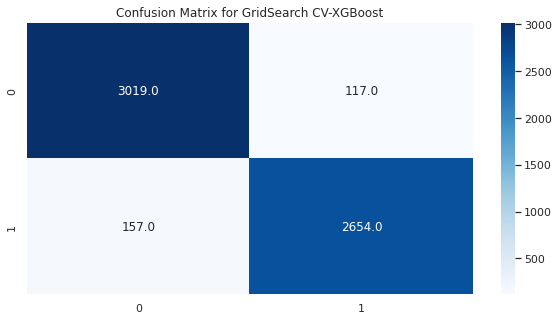

In [213]:
#Evaluation of the model
Y_pred = xg_model_gridcv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues")
plt.title("Confusion Matrix for GridSearch CV-XGBoost")

In [214]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Grid Search CV- XGBoost",Y_test,Y_pred,metrics_df)

3.2.2 Gradient Boosting Machine

Gradient Boosting is an extension over boosting method.

Gradient Boosting= Gradient Descent + Boosting.

It uses gradient descent algorithm which can optimize any differentiable loss function. An ensemble of trees are built one by one and individual trees are summed sequentially. Next tree tries to recover the loss (difference between actual and predicted values).

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,Y_train)

score=gbc.score(X_test,Y_test)
print(f'Gradient Boosting score : {score}')


Gradient Boosting score : 0.9517403732974609


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.17403732974608%



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

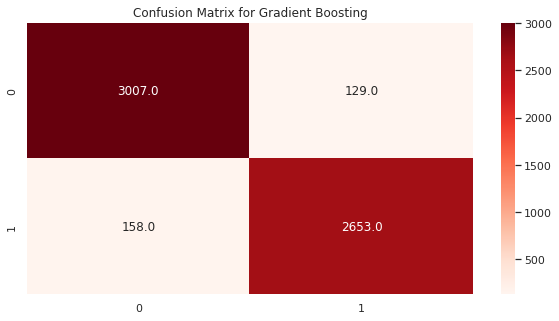

In [216]:
#Evaluation of the model
Y_pred = gbc.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Reds")
plt.title("Confusion Matrix for Gradient Boosting")

In [217]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Gradient Boosting ",Y_test,Y_pred,metrics_df)

Gradient Boosting Grid search cv

In [218]:
# Hyperparameter tuning.
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

In [219]:
gbc_gridseach_cv = GridSearchCV(estimator=gbc,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
# Evaluating the optimal parameters.
gbc_gridseach_cv.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_features=5,
                                                  n_estimators=500,
                                                  random_state=100),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [220]:
gbc_gridseach_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features=5,
                           min_samples_leaf=40, min_samples_split=10,
                           random_state=100)

In [221]:
gbc_gridseach_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 10,
 'n_estimators': 100}

In [222]:
gbc_model_gridcv_best = gbc_gridseach_cv.best_estimator_

In [223]:
Y_pred = gbc_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.96      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.29174373633765%



Text(0.5, 1.0, 'Confusion Matrix for Grid Search CV-Gradient Boosting')

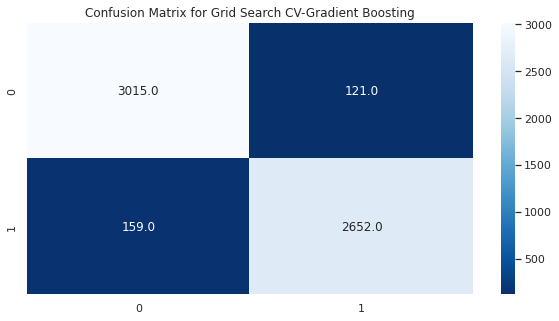

In [224]:
#Evaluation of the model
Y_pred = gbc_model_gridcv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues_r")
plt.title("Confusion Matrix for Grid Search CV-Gradient Boosting")

In [225]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Grid Search CV-Gradient Boosting",Y_test,Y_pred,metrics_df)

**4. K-Nearest Neighbour Model**

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [226]:
# KNN model implementation.
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.9490499411467967

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 94.90499411467968%



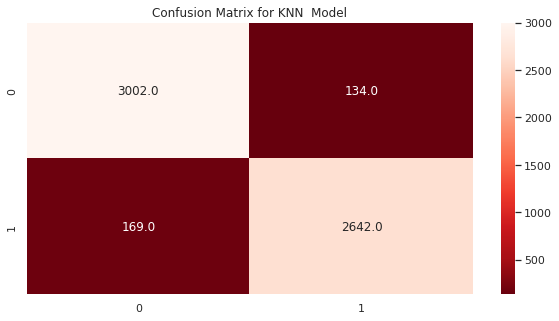

In [227]:
# Evaluation of the KNN model.
Y_pred = knn.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Reds_r")
plt.title("Confusion Matrix for KNN  Model")
plt.show()

In [228]:
# Adding model performance in evaluation metric dataframe.
metrics_df = add_metrics_details("KNN Model",Y_test,Y_pred,metrics_df)

**KNN GridSearchCV**

In [229]:
# Hyperparameter tuning.
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [230]:
# Best estimator.
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=30)

In [231]:
knn_cv_best = knn_cv.best_estimator_

# Evaluation of the model.


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.95      0.94      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.2412981335127%



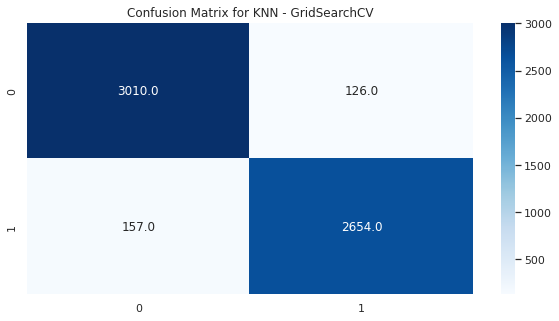

In [232]:
Y_pred = knn_cv_best.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues")
plt.title("Confusion Matrix for KNN - GridSearchCV")
plt.show()

In [233]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("KNN - GridSearchCV",Y_test,Y_pred,metrics_df)

**5. Support Vector Machine**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [234]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.9540945014292921

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3136
           1       0.95      0.95      0.95      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 95.4094501429292%



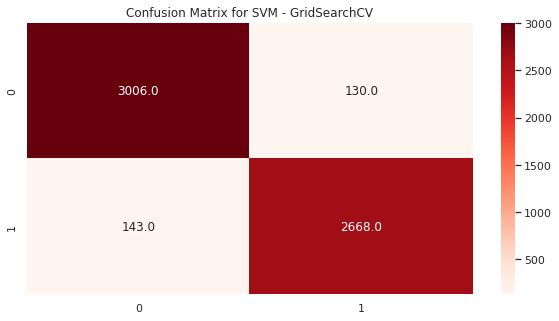

In [235]:
# Evaluation of the model.
Y_pred = svc.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Reds")
plt.title("Confusion Matrix for SVM - GridSearchCV")
plt.show()

In [236]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Support Vector Machine",Y_test,Y_pred,metrics_df)

Naive Bayes Classifier

Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text classification that includes a high-dimensional training dataset.Naive Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [237]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB()
spam_detect_model.fit(X_train, Y_train)
spam_detect_model.score(X_test, Y_test)

0.9470321170337985

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3136
           1       0.95      0.94      0.94      2811

    accuracy                           0.95      5947
   macro avg       0.95      0.95      0.95      5947
weighted avg       0.95      0.95      0.95      5947

Accuracy of the Model: 94.70321170337985%



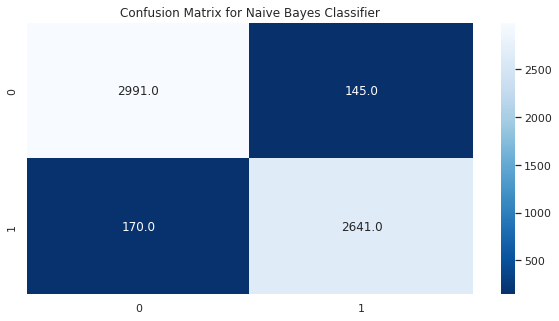

In [238]:
# Evaluation of the model.
Y_pred = spam_detect_model.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix( Y_test,Y_pred)

print("Accuracy of the Model: {}%\n".format((accuracy_score( Y_test,Y_pred))*100))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues_r")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [239]:
# Adding model performance in evaluation metric dataframe.
metrics_df=add_metrics_details("Naive Bayes Classifier",Y_test,Y_pred,metrics_df)

# **MODEL COMPARISON**

In [240]:
 # Sorting the dataset by high to low accuracy score.
metrics_df = metrics_df.sort_values("ACCURACY",ascending=False)
metrics_df = metrics_df.reset_index(drop=True)
metrics_df

# DataFrame clearly shows the winner model out of all though by a very minute margin and that is 'Random Forest - GridSearchCV'.
# 'Decision Tree' is the worst performer out of all.

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE
0,Support Vector Machine,0.954095,0.949128,0.953538,0.951328,0.953837
1,Grid Search CV- XGBoost,0.953926,0.944148,0.957777,0.950914,0.953420
2,XGBoost,0.953422,0.945571,0.955428,0.950474,0.953015
3,Logistic Regression,0.952917,0.951263,0.949237,0.950249,0.952832
4,Grid Search CV-Gradient Boosting,0.952917,0.943436,0.956365,0.949857,0.952426
5,KNN - GridSearchCV,0.952413,0.944148,0.954676,0.949383,0.951985
6,Random Forest - GridSearchCV,0.952245,0.943081,0.955315,0.949159,0.951770
7,Gradient Boosting,0.951740,0.943792,0.953630,0.948686,0.951329
8,Decision Tree,0.950900,0.942725,0.952895,0.947783,0.950476
9,Random Forest,0.950059,0.942014,0.951833,0.946898,0.949642


# Model Explanability/Interpretability

Interpretability is about the extent to which a cause and effect can be observed within a system. Or, to put it another way, it is the extent to which you can predict what is going to happen, given a change in input or algorithmic parameters.
Explainability, meanwhile, is the extent to which the internal mechanics of a machine or deep learning system can be explained in human terms.

SHAP

SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we’d make if that feature took some baseline value.

In [241]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
import shap
# Initialize JavaScript visualizations in notebook environment
def get_shap_js(model):
  shap.initjs()
# Define a tree explainer for the built model
  explainer = shap.TreeExplainer(rf)
# obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

In [243]:
#creating function to get shap summary in scatter plot
def shap_scatter_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)
  return shap.summary_plot(shap_values[0], X_test)

In [244]:
#creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(X_test)  
  return shap.summary_plot(shap_values, X_train, plot_type="bar")

In [245]:
X_test.iloc[0]


overall            8.0
seat_comfort       5.0
cabin_service      5.0
food_bev           2.0
entertainment      3.0
ground_service     5.0
value_for_money    5.0
Couple Leisure     0.0
Family Leisure     0.0
Solo Leisure       1.0
Economy Class      0.0
First Class        0.0
Premium Economy    0.0
Name: 36964, dtype: float64

In [246]:
X_test.mean()


overall            5.030604
seat_comfort       2.986447
cabin_service      3.303918
food_bev           2.827913
entertainment      2.843955
ground_service     2.858820
value_for_money    2.958803
Couple Leisure     0.254582
Family Leisure     0.184126
Solo Leisure       0.365899
Economy Class      0.748445
First Class        0.030604
Premium Economy    0.047587
dtype: float64

In [247]:
get_shap_js(rf)


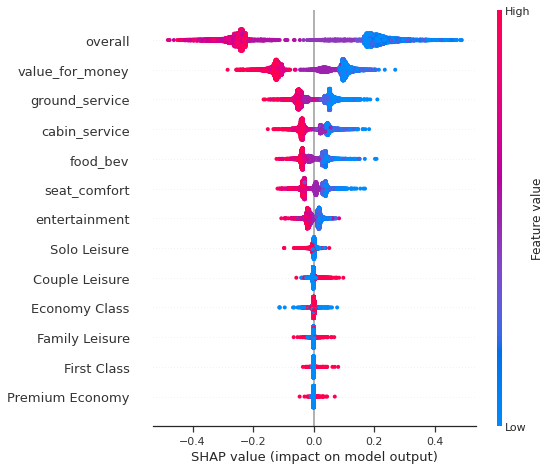

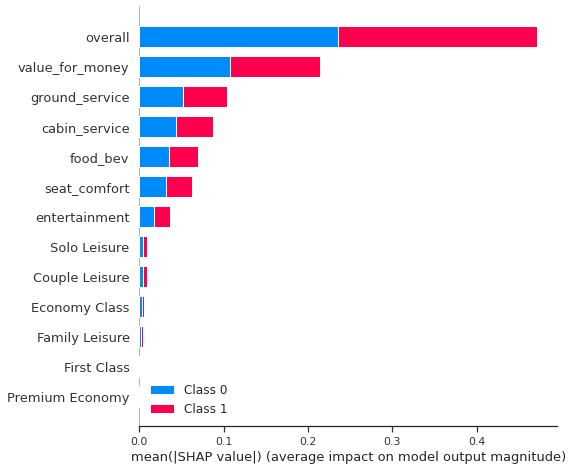

In [248]:
shap_scatter_plot(rf)
shap_bar_plot(rf)

## ELI5

ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions. It provides support for the following machine learning frameworks and packages:

scikit-learn. Currently ELI5 allows to explain weights and predictions of scikit-learn linear classifiers and regressors, print decision trees as text or as SVG, show feature importances and explain predictions of decision trees and tree-based ensembles.

In [249]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.1 MB/s 
     |████████████████████████████████| 133 kB 42.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=00d8b391c913b8e3331efb79b7bece1c36d1f787cc7a2949f27e4f85576a7b3a
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [250]:
import eli5 as eli

classification report :               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3136
           1       0.92      0.92      0.92      2811

    accuracy                           0.93      5947
   macro avg       0.93      0.93      0.93      5947
weighted avg       0.93      0.93      0.93      5947



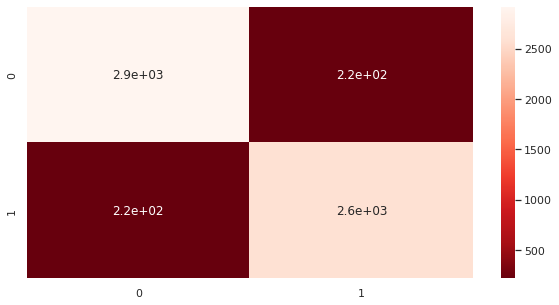

In [251]:
# Decision Tree Classifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(X_train, Y_train)
# Predicting the Test set results
y_pred= classifier_dtc.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf_rpt = classification_report(Y_test,y_pred)
print("classification report :", clf_rpt)
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap="Reds_r")

In [252]:
# Weights for XGBoost
eli.explain_weights(xgb_model)

Weight,Feature
0.9005,overall
0.0274,value_for_money
0.0190,ground_service
0.0115,cabin_service
0.0094,seat_comfort
0.0081,food_bev
0.0075,Couple Leisure
0.0045,entertainment
0.0044,Economy Class
0.0036,First Class


In [253]:
eli.show_prediction(xgb_model, X_test.iloc[1],
                    feature_names=list(X.columns),
                    show_feature_values=True)

In [254]:
eli.explain_weights(gbc)

Weight,Feature
0.4343 ± 0.5066,x0
0.3345 ± 0.4247,x6
0.1401 ± 0.3373,x5
0.0407 ± 0.3245,x3
0.0277 ± 0.3104,x1
0.0170 ± 0.2994,x2
0.0046 ± 0.3080,x4
0.0004 ± 0.1245,x7
0.0002 ± 0.1858,x10
0.0002 ± 0.1248,x11


In [255]:
eli.show_prediction(gbc, X_test.iloc[1],
                    feature_names=list(X.columns),
                    show_feature_values=True)

## **CONCLUSION**

We can conclude from EDA:

1. It is apparent that people gave a high recommendation to the economic class in cabin.This tells us that people like to travel in economy class due to the low price, but we can also see that they give economy class the highest negative ratings because they receive less infrastructure or service.Likewise, business class has received the highest rating due to the quality service offered there, while economy class has received the lowest rating due to its price or low attendance.

2.  Its clear from the countplot that 'Solo Leisure' has highest ratings among all whereas 'Family Leisure' has the least ratings.

3. 'British airways' has the maximum number of trips and this can be attributed to its ultra low cost fare compared to other airlines.

4. Clearly, 'No' responses are more as compared to 'Yes' responses in recommended that means airlines have to focus on some aspects to make there fliers happy.

5. In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.

6. In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.

7. In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.

8. In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows that airline has to improve their entertainment system as well.

9. In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows that airline has to improve their ground service.
10. In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows that airline has to make their flight service more cost effective.

* According to our business need we will give first priority to recall and then to accuracy from metrics point of view because we need to find how many people will recommend.
* We can see that our models have performed very well all of the models have given recall greater than 90% that means our models are performing very well.
* Logistic Regression has the highest recall value It gave the recall of 95.12% followed by SVM which gave 94.91%.
* Support Vector Machine has the highest accuracy from the models but others are also performed very well SVM gave 95.40% accuracy.
* Even after using Grid Search CV our models are giving similar accuracy.
* Naive Bayes Classifier and Random forest has the lowest recall of 93.95% 
* In Shap JS summary we can see positive features overall, value for money,numeric_review combined red color block pushes the prediction toward right over base value and causing positive model prediction for random forest model.
* In Shap summary scatter plot we can see in scatter plot high overall,value for money,numeric_review,cabin service,ground_service positive features and low airline_British_airways is increasing positive prediction and it is common for all models. Also we can see that overall,value for money,numeric_review,cabin service,ground_service has high shap feature value.
* From Eli5 we can see overall and value for money contributed more to give the positive recommendation and ground service and family leisure contributed to give negative recommendation for XGBoost .
* From Eli5 we can see overall and value for money contributed more to give the positive recommendation and Gradient Boosting model.


